# 521153S Deep Learning assignment 3: Training DL networks



This assignment is designed by Huali Xu.

## Outline 
#### In this assignment, you will learn:
* Writing custom dataset in Pytorch with training, validation and testing data.
* Building a Convolutional Neural Network (CNN) in Pytorch.
* Training and testing your CNN in Pytorch.

#### Tasks (<span style="color:green">15 points or more</span>)
* **Part 1.** Writing a custom dataset based on Fashion-MNIST
    * 1.1. Define a Dataset class (<span style="color:green">2 points</span>)
    * 1.2. Dataset checking (<span style="color:green">2.5 points</span>)
    * 1.3. Iterating through the dataset with batches (<span style="color:green">1 points</span>)<br>
* **Part 2.** Build a CNN on your own. (<span style="color:green">3.5 points</span>) <br>
* **Part 3.** Train and test your CNN. (<span style="color:green">6 points or more</span>)
    * 3.1. Create functions for train and evaluation (<span style="color:green">2.5 points</span>) <br>
    * 3.2. Train and test your network (<span style="color:green">1.5 point</span>) <br>
    * 3.3. Modification for your training (<span style="color:green">1 point or more</span>) <br>
    * Question: give your ideas to accelerate your training process (<span style="color:green">1 points or more</span>)


#### Environment
Python 3, Numpy, matplotlib, torch, torchvision

#### Dataset
* [**Fashion-MNIST**](https://github.com/zalandoresearch/fashion-mnist)
is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Here we choose the examples that with a label from the first 5 classes (including the training set of 30,000 examples and the test set of 5,000 examples). We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training, validation and testing splits. Using the Fashion-MNIST give you more room to wiggle your experiments.

#### Hints
* To find the place where you have to insert your solution, hit Crtl + F and search for **TODO:** . You are not supposed to modify the codes from other parts.
* Be careful with the shapes of the tensors flowing through the CNN model, making all the operations have compatible inputs and outputs. 

## Part 1. Writing a custom dataset based on Fashion-MNIST (<span style="color:green">5.5 points</span>)

### Part 1.1. Define a Dataset class (<span style="color:green">2 points</span>)

In [1]:
from onedrivedownloader import download
import os

link = 'https://unioulu-my.sharepoint.com/:u:/g/personal/hliu22_univ_yo_oulu_fi/EatDho3877JMlYugij_sKBkBqRz5s8hvmC1DQb0LT-W-lA?e=vkdebU'

if not os.path.exists('./data/fashion_mnist_npy'):
    print('Downloading dataset')
    download(link, filename="./fashion_mnist_npy_hw3.zip", unzip=True, unzip_path='./data/fashion_mnist_npy')

In [2]:
# import necessary packages
import os 
import torch 
import requests, zipfile, sys
import numpy as np
import matplotlib.pyplot as plt 
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms

# fashion_MNIST dataset 
data_dir='./data/fashion_mnist_npy/'
train_data = np.load(os.path.join(data_dir, 'train_data.npy'))
test_data = np.load(os.path.join(data_dir, 'test_data.npy'))
train_label = np.load(os.path.join(data_dir, 'train_labels.npy'))
test_label = np.load(os.path.join(data_dir, 'test_labels.npy'))

# select 5 classes
selected_classes = [0, 1, 2, 3, 4]

# choose the data from the selected 5 classes
train_mask = np.isin(train_label, selected_classes)
train_data = train_data[train_mask]
train_label = train_label[train_mask]

test_mask = np.isin(test_label, selected_classes)
test_data = test_data[test_mask]
test_label = test_label[test_mask]

# split the training data to a new training data and validation data
class_indices = [[] for i in range(5)]
for i, v in enumerate(train_label):
    class_indices[v].append(i)

indices_all = np.random.permutation(len(class_indices[0]))
# take the first 1000 indices of indices_all
indices = indices_all[:1000]
# take the rest of the indices of indices_all
indices_rest = indices_all[1000:]

valid_indices = []
train_indices = []
for i in range(5):
    # build indices for validation set
    valid_indices.extend(np.array(class_indices[i])[indices])
    # TODO: build indices for training set (0.25 points)
    # your code here
    train_indices.extend(np.array(class_indices[i])[indices_rest])

# write the custom dataset based on the dataset
class FashionMnist(Dataset):
    """Fashion Mnist dataset""" 

    def __init__(self, phase='train', transform=None):

        # TODO: now, split the predefined training data (1.5 points)
        # Make the examples of training, valid, and test as 25000, 5000 and 5000, and make samples in each category be balance.
        if 'train' == phase:
            # your code here
            self.data = train_data[train_indices]  
            self.label = train_label[train_indices]
            
        elif 'valid' == phase:
            # your code here 
            self.data = train_data[valid_indices]
            self.label = train_label[valid_indices]
            
        elif 'test' == phase:
            # your code here
            self.data = test_data
            self.label = test_label
            
        else:
            assert True, 'wrong phase'
            
        self.transform = transform 
        self.label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat']

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # TODO: get image and label according to the index (0.25 points)
        # your code here 
        img, label = self.data[index], self.label[index]
        
        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        img = Image.fromarray(img, mode='L')

        if self.transform is not None:
            img = self.transform(img)

        return img, label


### Part 1.2. Dataset checking (<span style="color:green">2.5 points</span>)
First, randomly show some images in training, validation and testing data and check if the images have correct labels.<br>
Secondly, check the number of images for each class, to make sure the dataset created correctly.

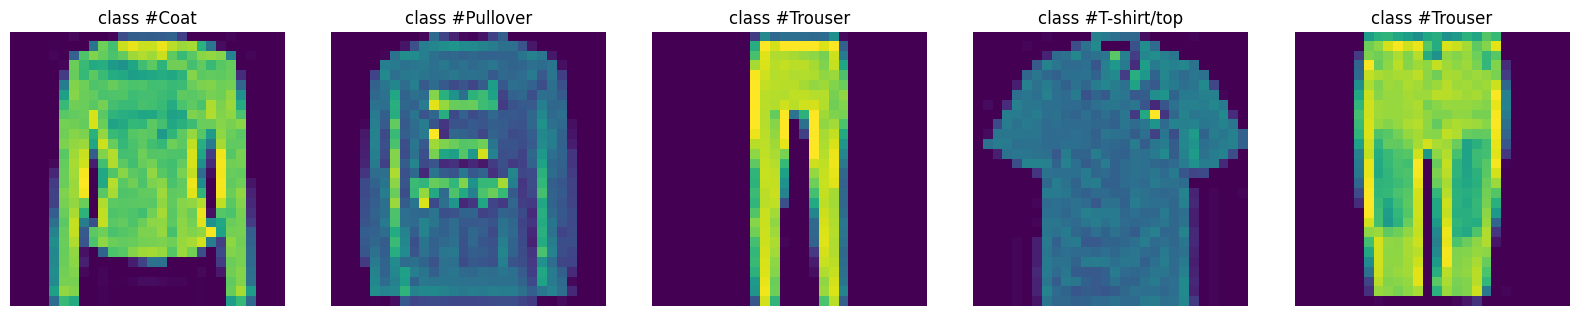

total number of training set: 25000
numer of images for class T-shirt/top: 5000
numer of images for class Trouser: 5000
numer of images for class Pullover: 5000
numer of images for class Dress: 5000
numer of images for class Coat: 5000


In [3]:
# checking training set
# randomly show some samples and their labels
# TODO: create a FashionMnist dataset for training, set transform to None (0.5 points)
# your code here
train_set = FashionMnist(phase='train', transform=None)

num_to_show = 5
idx = np.random.choice(range(len(train_set)), num_to_show, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = train_set[idx[i]] 
    label_name = train_set.label_names[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of training set: {}'.format(len(train_set)))
for i in range(5):
    print('numer of images for class {}: {}'.format(train_set.label_names[i], np.sum(train_set.label==i)))

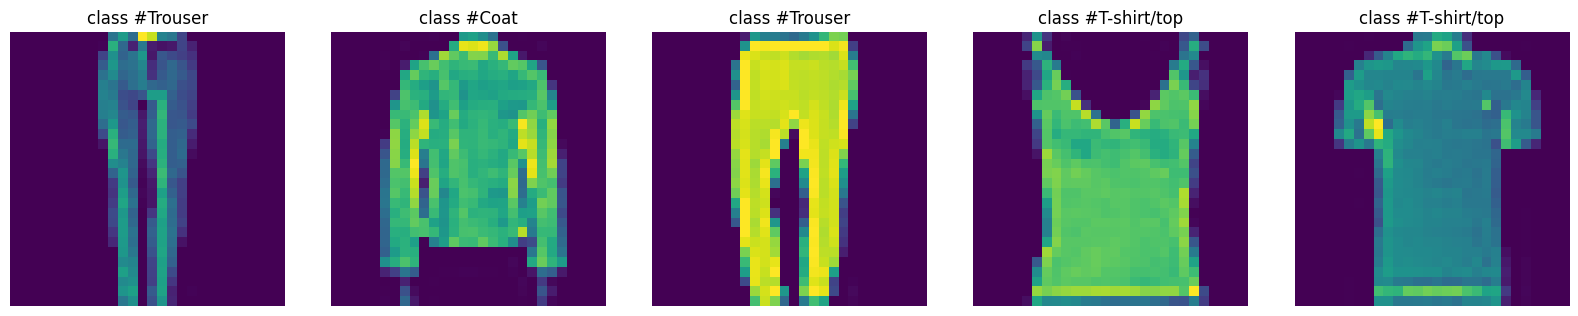

total number of validation set: 5000
number of images for class T-shirt/top: 1000
number of images for class Trouser: 1000
number of images for class Pullover: 1000
number of images for class Dress: 1000
number of images for class Coat: 1000


In [4]:
# TODO:checking validation data (1 points)
# your code here, like the training set, the output in this section should be like this (you can have your own visualization style)

# TODO: create a FashionMnist dataset for validation, set transform to None (0.5 points)
# your code here
valid_set = FashionMnist(phase='valid', transform=None)

# randomly show some samples and their labels
num_to_show = 5
idx = np.random.choice(range(len(valid_set)), num_to_show, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = valid_set[idx[i]] 
    label_name = valid_set.label_names[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of validation set: {}'.format(len(valid_set)))
for i in range(5):
    print('number of images for class {}: {}'.format(valid_set.label_names[i], np.sum(valid_set.label==i)))



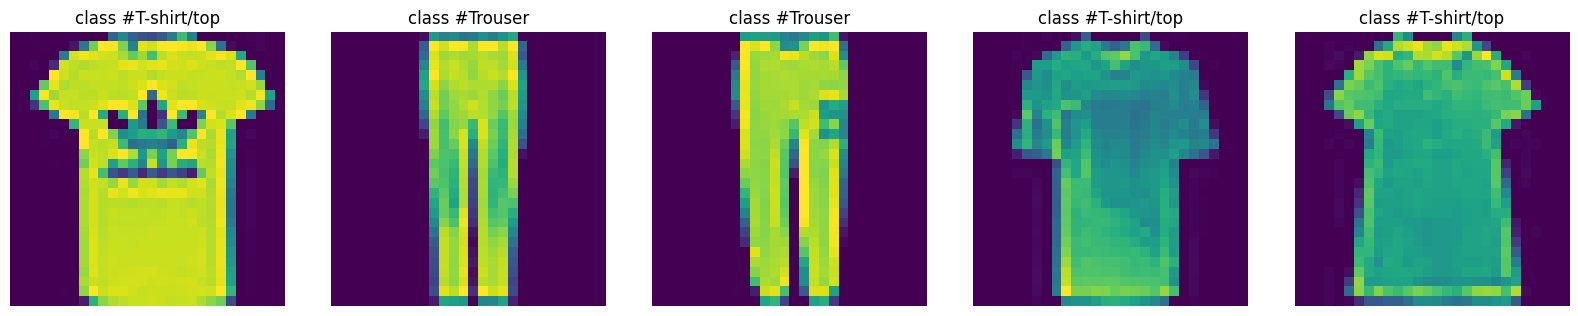

total number of testing set: 5000
number of images for class T-shirt/top: 1000
number of images for class Trouser: 1000
number of images for class Pullover: 1000
number of images for class Dress: 1000
number of images for class Coat: 1000


In [5]:
# TODO: checking testing data (1 points)
# your code here

# TODO: create a FashionMnist dataset for testing, set transform to None (0.5 points)
# your code here
test_set = FashionMnist(phase='test', transform=None)

# randomly show some samples and their labels
num_to_show = 5
idx = np.random.choice(range(len(test_set)), num_to_show, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = test_set[idx[i]] 
    label_name = test_set.label_names[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of testing set: {}'.format(len(test_set)))
for i in range(5):
    print('number of images for class {}: {}'.format(test_set.label_names[i], np.sum(test_set.label==i)))



### Part 1.3. Iterating through the dataset with batches (<span style="color:green">1 points</span>)
Here, we add more features with the help of [DataLoader](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#iterating-through-the-dataset):
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

`torch.utils.data.DataLoader` is an iterator which provides all these features. Parameters used below should be clear. One parameter of interest is collate_fn. You can specify how exactly the samples need to be batched using collate_fn. However, default collate should work fine for most use cases.

The `DataLoader` takes as input an instance of `FashionMnist` we defined in Part 1.1. Since images in the dataset currently are all in PIL format, we have to convert them to torch.Tensor by using a transform. Actually, `transform` is often used for data augmentation, further illustrations of `transform` can be found in [https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#writing-custom-datasets-dataloaders-and-transforms](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#writing-custom-datasets-dataloaders-and-transforms).

In [6]:
# Set batch_size to 64, shuffling the training set. Number of workers here is set to 0. If your system is Linux, 
# it is possible to try more workers to do multi-process parallel reading.
data_transform = transforms.Compose([transforms.ToTensor()])

train_set = FashionMnist(phase='train', transform=data_transform) #the other 0.25 points for create a FashionMnist dataset for training
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=0)

# TODO: create test_loader and valid_loader, both with no shuffling (1 points)
# your code here 
test_set = FashionMnist(phase='test', transform=data_transform)
valid_set = FashionMnist(phase='valid', transform=data_transform)

test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=0)
valid_loader = DataLoader(valid_set, batch_size=64, shuffle=False, num_workers=0)


## Part 2. Build a CNN on your own (<span style="color:green">3.5 points</span>)
Structure of the CNN (**Conv**: convolutional layer, **BN**: Batch Normalization layer, **Max_pool**: max pooling layer, **FC**: fully connected layer, batch_size=64):
<!--![model.png](attachment:model.png)-->
<img src=http://yty.kapsi.fi/DLcourse/ass3/CNN.png width="800">

To define your own Network, following the rule of thumb:
1. Define the layers in `__init__`.
2. Do the forward calculation in `forward`.

In [7]:
import torch
import torch.nn as nn

class Network(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # TODO: rest of layers (1.5 points)  
        # your code here
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
        

    def forward(self, x):
        x = self.conv1(x) 
        x = self.bn1(x)  
        x = self.relu1(x)  
        x = self.pool(x)

        # TODO: fill the rest part, you may need more lines like x = ... (2 points)
        # your code here
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = x.view(-1, 64 * 5 * 5)

        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)


        return x


## Part 3. Train and test your CNN model (<span style="color:green">6 points or more</span>)
### Part 3.1. Create functions for train and evaluation (<span style="color:green">2.5 points</span>)
* Instantiate a network.
* When training, create an optimizer to take care of network's parameters, calculate the loss and accuracy.
* When evaluation, only need to claculate the accuracy.

In [8]:
# instantiate a network
net = Network(num_classes=5)

# evaluation function
def eval(net, data_loader):
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
    net.eval()
    correct = 0.0
    num_images = 0.0
    for i_batch, (images, labels) in enumerate(data_loader):
        if use_cuda:
            images = images.cuda()
            labels = labels.cuda()
        outs = net(images) 
#         _, preds = outs.max(1)
        preds = outs.argmax(dim=1)
        correct += preds.eq(labels).sum()
        num_images += len(labels)

    acc = correct / num_images
    return acc

# training function
def train(net, train_loader, valid_loader):
    loss_function = torch.nn.CrossEntropyLoss()
    # TODO: build your SGD optimizer with learning rate=0.01, momentum=0.9, no weight decay (0.5 points)
    # your code here
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0)


    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
        
    epoches = 10
    for epoch in range(epoches):
        net.train() 
        correct = 0.0 # used to accumulate number of correctly recognized images
        num_images = 0.0 # used to accumulate number of images
        for i_batch, (images, labels) in enumerate(train_loader):
            if use_cuda:
                images = images.cuda()
                labels = labels.cuda()
            # TODO: rest of the training code
            # your code here, including the forward propagation (0.75 points), 
            # backward propagation (0.75 points) and calculating the accuracy (0.5 points)
            # Forward propagation
            outputs = net(images)
            loss = loss_function(outputs, labels)

            # Backward propagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, preds = outputs.max(1)
            correct += preds.eq(labels).sum().item()
            num_images += labels.size(0)
            
            
        acc = correct / num_images
        acc_eval = eval(net, valid_loader)
        print('epoch: %d, lr: %f, accuracy: %f, loss: %f, valid accuracy: %f' % (epoch, optimizer.param_groups[0]['lr'], acc, loss.item(), acc_eval))

    return net

### Part 3.2. Train and test your network (<span style="color:green">1.5 points</span>)

In [9]:
print('Please wait patiently, it may take some seconds...')
# TODO: train your network here (0.75 points)
# your code here

net = train(net, train_loader, valid_loader)


# TODO: test your network here on

acc_test = eval(net, test_loader)



print('accuracy on testing data: %f' % acc_test) #  a reference output is provided below:

Please wait patiently, it may take some seconds...
epoch: 0, lr: 0.010000, accuracy: 0.874360, loss: 0.223909, valid accuracy: 0.905600
epoch: 1, lr: 0.010000, accuracy: 0.917320, loss: 0.269682, valid accuracy: 0.915800
epoch: 2, lr: 0.010000, accuracy: 0.928520, loss: 0.140544, valid accuracy: 0.919200
epoch: 3, lr: 0.010000, accuracy: 0.935680, loss: 0.230431, valid accuracy: 0.928600
epoch: 4, lr: 0.010000, accuracy: 0.941200, loss: 0.226858, valid accuracy: 0.909000
epoch: 5, lr: 0.010000, accuracy: 0.948120, loss: 0.263304, valid accuracy: 0.930000
epoch: 6, lr: 0.010000, accuracy: 0.954800, loss: 0.109217, valid accuracy: 0.919600
epoch: 7, lr: 0.010000, accuracy: 0.958160, loss: 0.147648, valid accuracy: 0.929800
epoch: 8, lr: 0.010000, accuracy: 0.962000, loss: 0.047047, valid accuracy: 0.910600
epoch: 9, lr: 0.010000, accuracy: 0.964360, loss: 0.040905, valid accuracy: 0.929800
accuracy on testing data: 0.926800


### Part 3.3. Modification for your training (<span style="color:green">1 points or more</span>)
Try the following tips to improve your network's performance:
* Weight decay? (Please set a weight penalty in optimizer)
* More epoches? 
* Maybe more convolutinal or fc layers?

**Note**: Each tip has 0.5 points, more tips used, more points you will get. You could come up with your own tips, and they should be reasonable, persuasive and implemented with your code.

In [10]:

class Network(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

        # Introduce dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = x.view(-1, 64 * 5 * 5)

        x = self.fc1(x)
        x = self.relu3(x)

        # Apply dropout before the last fully connected layer
        x = self.dropout(x)

        x = self.fc2(x)

        return x


# Training function with weight decay, more epochs, and an extra layer
def train(net, train_loader, valid_loader):
    loss_function = torch.nn.CrossEntropyLoss()

    # Add weight decay to the optimizer
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()

    # Increase the number of epochs
    epochs = 15

    for epoch in range(epochs):
        net.train()
        correct = 0.0
        num_images = 0.0
        for i_batch, (images, labels) in enumerate(train_loader):
            if use_cuda:
                images = images.cuda()
                labels = labels.cuda()

            outputs = net(images)
            loss = loss_function(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, preds = outputs.max(1)
            correct += preds.eq(labels).sum().item()
            num_images += labels.size(0)

        acc = correct / num_images
        acc_eval = eval(net, valid_loader)
        print('epoch: %d, lr: %f, accuracy: %f, loss: %f, valid accuracy: %f' % (epoch, optimizer.param_groups[0]['lr'], acc, loss.item(), acc_eval))

    return net


print('Please wait patiently, it may take some seconds...')
# Instantiate a network
net = Network(num_classes=5)

# Train the network
net = train(net, train_loader, valid_loader)

# Evaluate on testing data
acc_test = eval(net, test_loader)

print('accuracy on testing data: %f' % acc_test)


Please wait patiently, it may take some seconds...
epoch: 0, lr: 0.010000, accuracy: 0.845480, loss: 0.441181, valid accuracy: 0.911000
epoch: 1, lr: 0.010000, accuracy: 0.895760, loss: 0.437442, valid accuracy: 0.905000
epoch: 2, lr: 0.010000, accuracy: 0.907920, loss: 0.125867, valid accuracy: 0.922400
epoch: 3, lr: 0.010000, accuracy: 0.915800, loss: 0.317034, valid accuracy: 0.925600
epoch: 4, lr: 0.010000, accuracy: 0.923080, loss: 0.175127, valid accuracy: 0.934200
epoch: 5, lr: 0.010000, accuracy: 0.927320, loss: 0.087863, valid accuracy: 0.912000
epoch: 6, lr: 0.010000, accuracy: 0.931560, loss: 0.379711, valid accuracy: 0.915800
epoch: 7, lr: 0.010000, accuracy: 0.936400, loss: 0.161528, valid accuracy: 0.938200
epoch: 8, lr: 0.010000, accuracy: 0.937760, loss: 0.097398, valid accuracy: 0.935600
epoch: 9, lr: 0.010000, accuracy: 0.939840, loss: 0.063669, valid accuracy: 0.936400
epoch: 10, lr: 0.010000, accuracy: 0.941280, loss: 0.153236, valid accuracy: 0.916600
epoch: 11, lr

###  Question: give your ideas to accelerate your training process (<span style="color:green">1 points or more</span>)
#### Your answer: (the first two is 0.5 points each, the rest is 0.25 points each. More ideas, more points, with the upper limit 2 points in total. Please also describe your idea at least for couple of sentences as the ideas should be reasonable and persuasive.)

1.  I have set weight decay = 0.001
2.  I have increase epocs =15
3.  I have added dropout in my model.